In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/United Airlines/Datasets/Survey data_Inflight Satisfaction Score.csv')

In [ ]:
# dropping unwanted columns
columns_to_drop = ['driver_sub_group1', 'driver_sub_group2', 'ua_uax', 'departure_gate', 'arrival_gate', 'equipment_type_code']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Converting data types
df['score'] = pd.to_numeric(df['score'], errors='coerce')
df['scheduled_departure_date'] = pd.to_datetime(df['scheduled_departure_date'])

# Removing Missing Values
df = df[df['score'].notnull()]
df

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,arrival_delay_minutes,arrival_delay_group,...,loyalty_program_level,generation,fleet_type_description,fleet_usage,actual_flown_miles,haul_type,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,2022-09-01,How satisfied were you with the food & beverag...,2.0,Dissatisfied,-24,Early & Ontime,...,NaN,Gen X,CRJ-200,Express,67,Short,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,2022-09-01,How satisfied were you with the food & beverag...,5.0,Satisfied,10,Delayed,...,premier platinum,Boomer,ERJ-175,Express,72,Short,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,2022-09-01,How satisfied were you with the food & beverag...,5.0,Satisfied,-8,Early & Ontime,...,premier platinum,Gen X,ERJ-175,Express,72,Short,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,2022-09-01,How satisfied were you with the food & beverag...,3.0,Dissatisfied,-11,Early & Ontime,...,non-elite,Boomer,CRJ-200,Express,72,Short,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,2022-09-01,How satisfied were you with the food & beverag...,5.0,Satisfied,18,Delayed,...,premier silver,Boomer,A319-100,Mainline,72,Short,Domestic,member,PANASONIC,hub departure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47066,189,EWX,JNX,O0XXXP,2022-09-30,How satisfied were you with the food & beverag...,4.0,Satisfied,-3,Early & Ontime,...,NaN,Gen X,B787-9,Mainline,7989,Long,International,non-member,PANASONIC,hub departure
47067,188,JNX,EWX,E6XXCG,2022-09-30,How satisfied were you with the food & beverag...,3.0,Dissatisfied,-22,Early & Ontime,...,non-elite,Gen X,B787-9,Mainline,7989,Long,International,member,PANASONIC,spoke departure
47069,2,SFX,SIX,IPXXM3,2022-09-30,How satisfied were you with the food & beverag...,4.0,Satisfied,-16,Early & Ontime,...,NaN,Boomer,B787-9,Mainline,8440,Long,International,non-member,PANASONIC,hub departure
47070,2,SFX,SIX,O5XXK4,2022-09-30,How satisfied were you with the food & beverag...,4.0,Satisfied,-16,Early & Ontime,...,premier gold,Gen X,B787-9,Mainline,8440,Long,International,member,PANASONIC,hub departure


In [ ]:
# Percentage of missing values in each column
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
cabin_name,11847,0.338844
loyalty_program_level,9381,0.268312
media_provider,1534,0.043875
entity,3,0.000086
number_of_legs,0,0.000000
response_group,0,0.000000
international_domestic_indicator,0,0.000000
haul_type,0,0.000000
actual_flown_miles,0,0.000000
fleet_usage,0,0.000000


In [ ]:
# Creating a new column for combining 'cabin_code_desc' and 'cabin_name'
def replace_cabin(row):
    if row['cabin_name'] in ['economy_plus', 'economy']:
        return 'economy_plus' if 'economy_plus' in row['cabin_name'] else 'economy'
    elif pd.isna(row['cabin_name']):
        return row['cabin_code_desc']
    return row['cabin_name']

df['new_cabin'] = df.apply(replace_cabin, axis=1)
df.drop(["cabin_name" , "cabin_code_desc"] , axis= 1 , inplace =True)

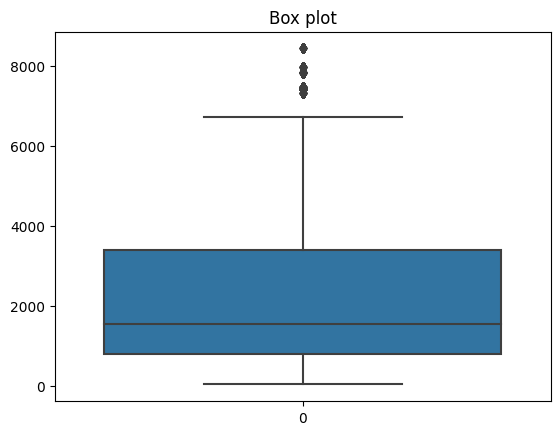

In [ ]:
# Box plot of actual_flown_miles variable of cleaned data i.e., after removing
sns.boxplot(df['actual_flown_miles'])
plt.title('Box plot')
plt.show()

In [ ]:
# Removing Outliers
Q1 = df['actual_flown_miles'].quantile(0.25)
Q3 = df['actual_flown_miles'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['actual_flown_miles'] < (Q1 - 1.5 * IQR)) |
(df['actual_flown_miles'] > (Q3 + 1.5 * IQR))]
df = df.drop(outliers.index, axis=0)

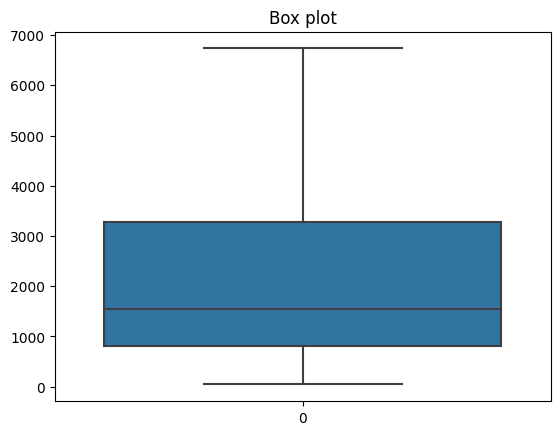

In [ ]:
# Box plot of actual_flown_miles variable of cleaned data i.e., after removing
sns.boxplot(df['actual_flown_miles'])
plt.title('Box plot')
plt.show()

In [ ]:
# Calculate % average inflight satisfaction
satisfied_sample = df[df['score'].isin([4, 5])].copy()
total_sample = len(df)
percent_satisfaction = (len(satisfied_sample) / total_sample) * 100

print(f"% Average Inflight Satisfaction: {percent_satisfaction:.2f}%")

% Average Inflight Satisfaction: 36.32%


In [ ]:
# Calculate % inflight satisfaction grouped by flight_number

satisfied_counts = satisfied_sample.groupby('flight_number').size().reset_index(name='satisfied_count')
total_samples = df.groupby('flight_number').size().reset_index(name='total_count')
satisfaction_data = pd.merge(total_samples, satisfied_counts, on='flight_number', how='left')

satisfaction_data['% Inflight Satisfaction'] = (satisfaction_data['satisfied_count'] / satisfaction_data['total_count']) * 100
satisfaction_data

,flight_number,total_count,satisfied_count,% Inflight Satisfaction
0,4,29,6.0,20.689655
1,5,64,23.0,35.937500
2,6,52,11.0,21.153846
3,7,7,4.0,57.142857
4,8,14,2.0,14.285714
...,...,...,...,...
4033,6363,11,4.0,36.363636
4034,6369,5,3.0,60.000000
4035,6373,1,NaN,NaN
4036,6375,6,1.0,16.666667


In [ ]:
# Top 10 flights
top_10_satisfaction = satisfaction_data.sort_values('% Inflight Satisfaction', ascending=False).head(10)
print(top_10_satisfaction[['flight_number', '% Inflight Satisfaction']])

      flight_number  % Inflight Satisfaction
2379           3517                    100.0
1149           1466                    100.0
2602           3784                    100.0
2606           3790                    100.0
2611           3797                    100.0
3798           5911                    100.0
2635           3825                    100.0
2638           3831                    100.0
2641           3834                    100.0
2642           3836                    100.0


In [ ]:
# Average satisfaction score when grouped by 'haul_type' and 'hub_spoke'
grouped_data = pd.DataFrame(df.groupby(['haul_type', 'hub_spoke'])['score'].mean().reset_index())
grouped_data

,haul_type,hub_spoke,score
0,Long,hub departure,2.576747
1,Long,spoke departure,2.823778
2,Medium,hub departure,2.996543
3,Medium,spoke departure,2.909269
4,Short,hub departure,2.841270
5,Short,spoke departure,2.928917


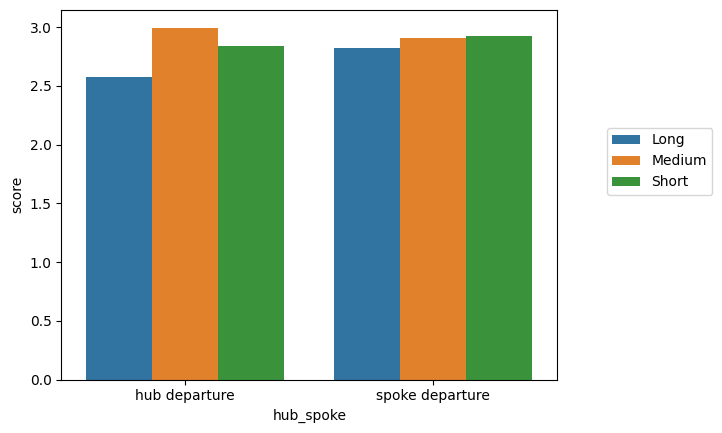

In [ ]:
sns.barplot(data=grouped_data, x='hub_spoke', y='score', hue='haul_type')
plt.legend(loc = (1.1, 0.5))

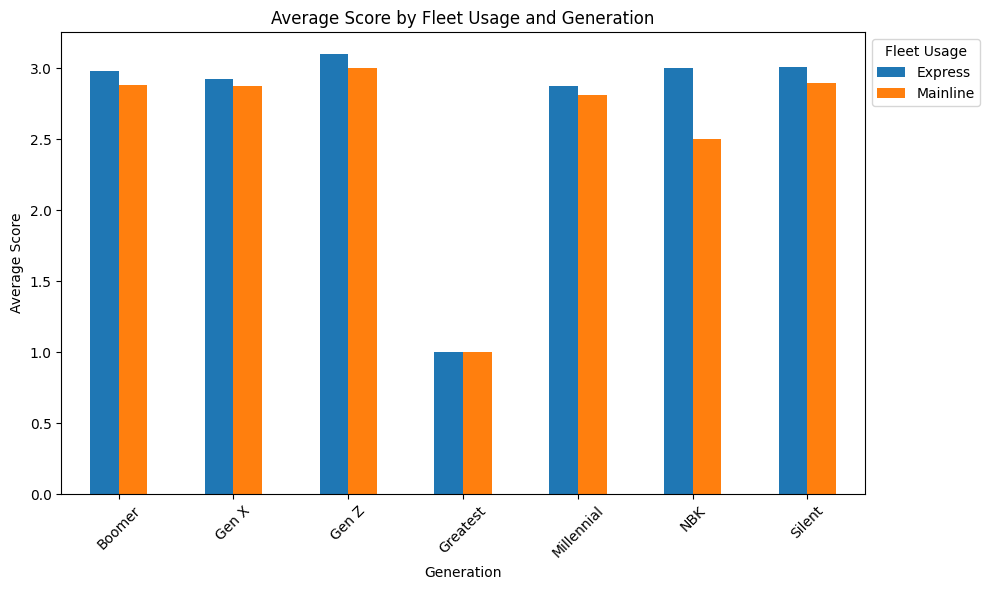

In [ ]:
# Clustered Column Chart to visualise Average score when grouped by Fleet Usage and Generation
grouped_data = df.groupby(['generation', 'fleet_usage'])['score'].mean().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Average Score by Fleet Usage and Generation')
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Fleet Usage', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

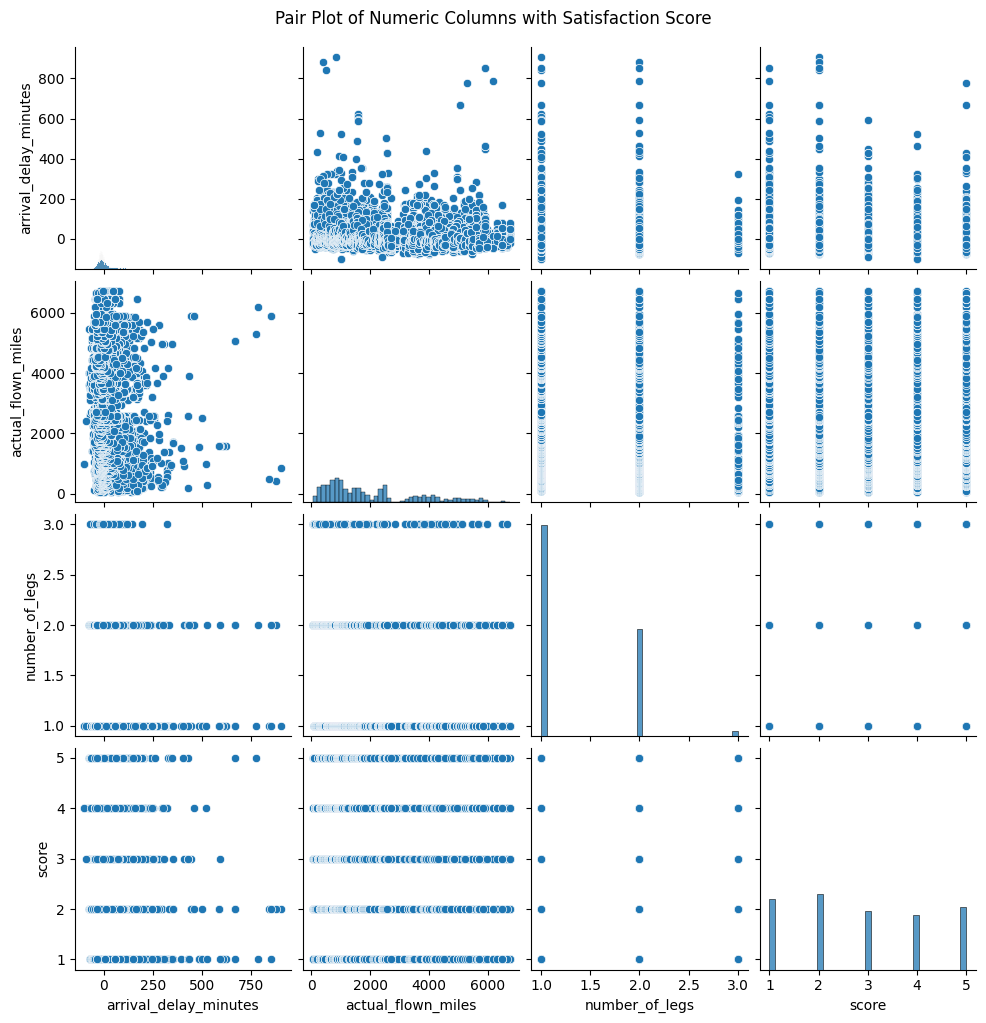

In [ ]:
# Pairplot
numeric_columns = ['arrival_delay_minutes', 'actual_flown_miles', 'number_of_legs', 'score']
sns.pairplot(df[numeric_columns])
plt.suptitle('Pair Plot of Numeric Columns with Satisfaction Score', y=1.02)
plt.show()

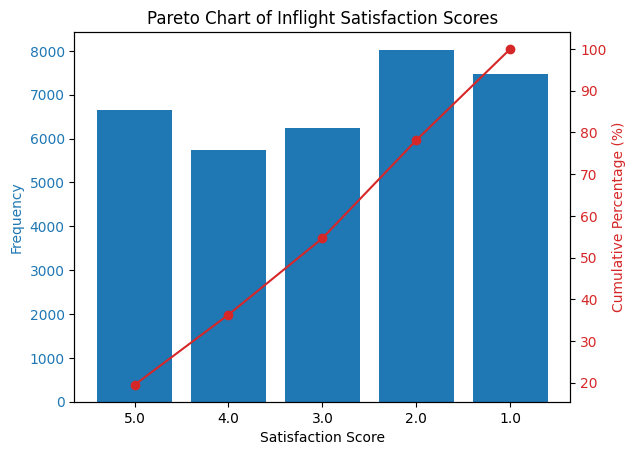

In [ ]:
# Pareto Chart

satisfaction_counts = df['score'].value_counts().sort_index(ascending=False)
cumulative_percentage = satisfaction_counts.cumsum() / satisfaction_counts.sum() * 100

fig, ax1 = plt.subplots()

ax1.bar(satisfaction_counts.index.astype(str), satisfaction_counts.values, color='tab:blue')
ax1.set_xlabel('Satisfaction Score')
ax1.set_ylabel('Frequency', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(satisfaction_counts.index.astype(str), cumulative_percentage, color='tab:red', marker='o')
ax2.set_ylabel('Cumulative Percentage (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Pareto Chart of Inflight Satisfaction Scores')
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/United Airlines/Datasets/edit.csv')